# Rainfall Prediction using Weather Data (2015-2025)

## Project Overview and Objective

This project aims to develop a predictive model for rainfall using weather data collected from 2015 to 2025.
The key objective is to accurately forecast:
- Whether it will rain tomorrow(Classification Task)
- The amount of rainfall expected tomorrow (Regression Task)

By solving these problems, the project provides actionable insights that can be useful for farmers, logistics companies, 
city planners, and anyone impacted by daily weather conditions.

**Machine Learning Tasks Involved:**
- **Classification**: Predicting rain_tomorrow as Yes or No.
- **Regression**: Predicting the amount_rain_tomorrow in millimeters.

**Expected Outcomes:**
- A reliable, trained machine learning model that can:
   - Help users plan better for potential rainfall
   - Serve as a foundation for weather-related decision-making tools

## Problem Description

Accurate rainfall prediction is a vital component of weather forecasting, particularly in regions where agriculture, transportation, and public safety are highly influenced by daily weather conditions. Unexpected rainfall can lead to poor planning, crop damage, disrupted supply chains, and even accidents.

By developing a machine learning model capable of predicting both the likelihood of rain and the expected amount, we can significantly improve planning and preparedness.

**Why This Problem Is Worth Solving:**
- Rain forecasting improves **resource allocation** in agriculture (e.g., irrigation planning, fertilizer application).
- It assists **logistics and transport** companies in adjusting schedules for safety and efficiency.
- Urban planning and drainage management benefit from better predictions to mitigate **flooding and traffic congestion**.

**Who Benefits:**
- **Farmers**
- **Commuters and logistics planners**
- **City infrastructure and emergency services**
- **Everyday users checking the weather to plan their day**

**Real-World Implications:**
A reliable rain prediction model empowers better decision-making, reduces economic losses, and increases the resilience of systems that depend on accurate weather information.


## Module Imports

All necessary python libraries for dta collection, cleaning, analysis, modelling, and evaluation are imported

In [ ]:
# General utilities
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sns

# Data preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor

# API & Web Scraping
import os

# Display settings
pd.options.display.float_format = '{:.2f}'.format

## Data Collection

This project uses **historical weather data** collected from **Visual Crossing**, a reputable weather data provider. The data spans from **January 2015 to April 2025**, focusing on the location: **Osun State, Nigeria**.

### Source
- **Provider:** Visual Crossing  
- **Format:** CSV (via API request)  
- **Location:** Osun  
- **Time Range:** 2015–2025  

### Method of Collection
The data was collected using **API scraping** in CSV format. A dedicated function, `scrape_and_save()`, was implemented to handle the scraping in an efficient and structured way. The function takes parameters such as:
- `filename`: for storing the retrieved CSV
- `start_date` & `end_date`: the time window to scrape
- `API_KEY`: for authenticating API requests

Because of API limitations and data size:
- Data was retrieved **one year at a time** to avoid exceeding API call limits.
- Scraping had to be spread across **three days** using **multiple Visual Crossing accounts** and API keys (e.g., `API_KEY1`, `API_KEY2`) to bypass request quotas.
- Error handling (`try-except`) was used to **skip already-scraped datasets**, preserving API call usage.

This modular approach ensured data integrity while handling provider-imposed constraints.


In [2]:
location = "Osun"
API_KEY1 = "54DTAPDQ4PXXZTX87J3X6HJ7J"
API_KEY2 = "5LDDMBTUEW4NBYXFN86C4EZLX"

In [3]:
def scrape_and_save(filename, start_date, end_date, API_KEY):
    api_url = f"""https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}%2C%20Nigeria/{start_date}/{end_date}?unitGroup=us&include=days&key={API_KEY}&contentType=csv"""
    if os.path.exists(filename):
        print("Reading from saved file...")
        df = pd.read_csv(filename)
        
    else:
        try:
            url = api_url
            print("Fetching from API....")
            df = pd.read_csv(url)
            df.to_csv(filename, index=False)
            print("Data saved to CSV.")
        except Exception as e:
            print("Failed to fetch data.", e)

In [4]:
scrape_and_save(filename = "osun_rainfall_data.csv", start_date = '2024-01-01', end_date = '2025-04-18', API_KEY = API_KEY1)
scrape_and_save(filename = "osun_rainfall_data2.csv", start_date = '2023-01-01', end_date = '2023-12-31', API_KEY = API_KEY1)
scrape_and_save(filename = "osun_rainfall_data3.csv", start_date = '2022-01-01', end_date = '2022-12-31', API_KEY = API_KEY2)
scrape_and_save(filename = "osun_rainfall_data4.csv", start_date = '2021-01-01', end_date = '2021-12-31', API_KEY = API_KEY2) 
scrape_and_save(filename = "osun_rainfall_data5.csv", start_date = '2020-01-01', end_date = '2020-12-31', API_KEY = API_KEY2)
scrape_and_save(filename = "osun_rainfall_data6.csv", start_date = '2019-01-01', end_date = '2019-12-31', API_KEY = API_KEY2)
scrape_and_save(filename = "osun_rainfall_data7.csv", start_date = '2018-01-01', end_date = '2018-12-31', API_KEY = API_KEY1)
scrape_and_save(filename = "osun_rainfall_data8.csv", start_date = '2017-01-01', end_date = '2017-12-31', API_KEY = API_KEY1)
scrape_and_save(filename = "osun_rainfall_data9.csv", start_date = '2016-01-01', end_date = '2016-12-31', API_KEY = API_KEY1)
scrape_and_save(filename = "osun_rainfall_data10.csv", start_date = '2015-01-01', end_date = '2015-12-31', API_KEY = API_KEY1)

Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...
Reading from saved file...


## Data Cleaning & Preprocessing

The collected weather data from 2015 to 2025 underwent a thorough cleaning and preprocessing phase to prepare it for modeling.

### Key Steps Taken:

- **Merging Data**: Scraped annual CSV files were combined into a single DataFrame.
- **Duplicate Handling**: Removed duplicate entries based on the `datetime` column.
- **Datetime Processing**:
  - Converted the `datetime` column to appropriate datetime format.
  - Sorted the dataset chronologically.
- **Feature Reduction**: Dropped irrelevant or redundant columns that would not contribute to model performance.
- **Feature Engineering**:
  - **Temporal Features**: Extracted `year`, `month`, `day`, `day_of_week`, and `day_of_year` from the `datetime` column.
  - **Lag Features**: Created `rain_yesterday` and `rain_last_7_days` based on the `precip` values.
- **Target Variables**:
  - `rain_tomorrow`: Binary classification target (rain or no rain next day).
  - `amount_rain_tomorrow`: Regression target (expected rainfall in mm).
- **Handling Missing Values**:
  - Columns with heavy missing data (e.g., `visibility`) were imputed using the **median**.
  - Rows with minor missing values were dropped.
- **Final Touches**:
  - Renamed columns for clarity.
  - Ordered columns logically for better readability.

This structured approach ensured a clean and informative dataset ready for exploratory analysis and modeling.

In [5]:
# Merging Scraped Data

files = ['osun_rainfall_data.csv', 'osun_rainfall_data2.csv', 'osun_rainfall_data3.csv',
         'osun_rainfall_data4.csv', 'osun_rainfall_data5.csv', 'osun_rainfall_data6.csv',
         'osun_rainfall_data7.csv', 'osun_rainfall_data8.csv', 'osun_rainfall_data9.csv', 'osun_rainfall_data10.csv']
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)
df.head(1)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Osun, Ekiti, Nigeria",2024-01-01,96.00,66.30,79.60,92.80,66.30,78.60,54.10,45.40,...,22.10,9,10.00,2024-01-01T06:53:00,2024-01-01T18:32:59,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,remote


In [6]:
df.drop_duplicates(subset='datetime', inplace=True)

df.to_csv("osun_weather_full_data.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3761 non-null   object 
 1   datetime          3761 non-null   object 
 2   tempmax           3761 non-null   float64
 3   tempmin           3761 non-null   float64
 4   temp              3761 non-null   float64
 5   feelslikemax      3761 non-null   float64
 6   feelslikemin      3761 non-null   float64
 7   feelslike         3761 non-null   float64
 8   dew               3761 non-null   float64
 9   humidity          3761 non-null   float64
 10  precip            3761 non-null   float64
 11  precipprob        3761 non-null   int64  
 12  precipcover       3761 non-null   float64
 13  preciptype        2436 non-null   object 
 14  snow              3761 non-null   int64  
 15  snowdepth         3761 non-null   int64  
 16  windgust          3761 non-null   float64


In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime').reset_index(drop=True)

df.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Osun, Ekiti, Nigeria",2015-01-01,90.90,65.70,77.20,86.90,65.70,75.80,40.10,27.90,...,22.10,9,NaN,2015-01-01T06:53:03,2015-01-01T18:33:04,0.37,Clear,Clear conditions throughout the day.,clear-day,remote
1,"Osun, Ekiti, Nigeria",2015-01-02,90.20,64.10,77.00,86.70,64.10,75.90,51.10,46.30,...,22.00,9,NaN,2015-01-02T06:53:28,2015-01-02T18:33:35,0.40,Clear,Clear conditions throughout the day.,clear-day,remote
2,"Osun, Ekiti, Nigeria",2015-01-03,90.40,62.50,76.50,86.30,62.50,75.20,37.80,27.00,...,22.40,9,NaN,2015-01-03T06:53:52,2015-01-03T18:34:07,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote


In [9]:
pd.set_option('display.max_columns', None)
df.head(1)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Osun, Ekiti, Nigeria",2015-01-01,90.90,65.70,77.20,86.90,65.70,75.80,40.10,27.90,0.00,0,0.00,NaN,0,0,16.10,6.70,16.80,1011.80,14.60,NaN,255.60,22.10,9,NaN,2015-01-01T06:53:03,2015-01-01T18:33:04,0.37,Clear,Clear conditions throughout the day.,clear-day,remote


In [10]:
df = df.drop(columns=['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
                      'feelslike', 'dew', 'name', 'precipcover', 'precipprob', 'preciptype', 'snow', 'snowdepth',
                      'windgust', 'winddir', 'solarradiation', 'solarenergy', 'uvindex', 
                      'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
                      'description', 'icon', 'stations'])

In [11]:
df.head(1)

,datetime,temp,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility
0,2015-01-01,77.20,27.90,0.00,6.70,1011.80,14.60,NaN


In [12]:
# Temporal Features

df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_of_year'] = df['datetime'].dt.dayofyear
df = df.drop(columns='datetime')

In [13]:
df.head(1)

,temp,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,Year,Month,Day,day_of_week,day_of_year
0,77.20,27.90,0.00,6.70,1011.80,14.60,NaN,2015,1,1,3,1


In [14]:
# Lag Features
df['rain_yesterday'] = df['precip'].shift(1)
df['rain_last_7_days'] = df['precip'].shift(1).rolling(window=7).mean()

In [15]:
# Target Variables

df['rain_tomorrow'] = df['precip'].shift(-1).apply(lambda x: 1 if x > 0 else 0)
df['amount_rain_tomorrow']= df['precip'].shift(-1)
df = df.drop(columns='precip')
df.head()

,temp,humidity,windspeed,sealevelpressure,cloudcover,visibility,Year,Month,Day,day_of_week,day_of_year,rain_yesterday,rain_last_7_days,rain_tomorrow,amount_rain_tomorrow
0,77.20,27.90,6.70,1011.80,14.60,NaN,2015,1,1,3,1,NaN,NaN,0,0.00
1,77.00,46.30,7.20,1012.80,1.00,NaN,2015,1,2,4,2,0.00,NaN,0,0.00
2,76.50,27.00,7.60,1014.50,25.20,NaN,2015,1,3,5,3,0.00,NaN,0,0.00
3,75.00,21.40,8.30,1015.20,0.00,NaN,2015,1,4,6,4,0.00,NaN,0,0.00
4,73.80,23.50,8.30,1014.40,0.00,NaN,2015,1,5,0,5,0.00,NaN,0,0.00


In [16]:
# Handling Missing Values

df['visibility'] = df['visibility'].fillna(df['visibility'].median())
df.dropna(inplace=True)

In [17]:
# Final Touches

df = df.rename(columns={'temp': 'temperature', 'sealevelpressure': 'pressure'})

cols = ['Year', 'Month', 'Day', 'day_of_week', 
        'day_of_year', 'temperature', 'pressure', 'humidity', 
        'windspeed', 'cloudcover', 'visibility', 'rain_yesterday', 
        'rain_last_7_days', 'rain_tomorrow', 'amount_rain_tomorrow']

df = df[cols]

df.sample(1)

,Year,Month,Day,day_of_week,day_of_year,temperature,pressure,humidity,windspeed,cloudcover,visibility,rain_yesterday,rain_last_7_days,rain_tomorrow,amount_rain_tomorrow
137,2015,5,18,0,138,79.40,1011.80,83.40,16.10,94.20,8.40,0.85,0.27,1,0.29


## Exploratory Data Analysis (EDA)

A comprehensive exploratory analysis was conducted to understand the structure and behavior of the data and to identify patterns that could influence the prediction of rainfall.

### Dataset Overview
- Ensured data consistency and confirmed absence of missing values.
- Reviewed data types and statistical summaries using `.info()` and `.describe()`.

### Target Variable Distribution

- **Classification Target (`rain_tomorrow`)**:
  - **Yes (1)**: 64.14%
  - **No (0)**: 35.86%
  - A slight class imbalance exists, favoring rainy days.

- **Regression Target (`amount_rain_tomorrow`)**:
  - Originally highly skewed (**skewness = 2.42**).
  - Applied `log1p` transformation to correct skewness (**new skewness = 1.65**).
  - Transformation improved the distribution for modeling.

### Temporal and Seasonal Patterns

- **Day of the Week Adjustment**: Adjusted `day_of_week` values to range from 1 (Monday) to 7 (Sunday).
- **Monthly Rainfall Trends**:
  - Line plot shows that monthly average rainfall typically **rises from the start of the year**, peaks around the middle months, and **declines toward year-end**.
  - **2016** experienced the **highest peak** among all years.
- **Boxplots**:
  - By **month**: Rainfall increases steadily up to September, with very low rainfall in the first and last two months.
  - By **day of week**: No clear distinction in rainfall distribution across weekdays.

### Feature Distributions

- **Histogram Analysis**:
  - **Temperature** and **pressure** follow an approximately normal distribution.
  - **Cloud cover** and **humidity** are **left-skewed**.
  - **Visibility** appears almost binary in distribution.

### Correlations and Grouped Insights

- **Group-by Analysis**:
  - Averaged features based on `rain_tomorrow` target class:
    - **Higher on no-rain days**: Temperature, visibility.
    - **Higher on rain days**: Pressure, humidity, wind speed, cloud cover.

These findings offer valuable context for feature importance and model design, highlighting the seasonality and variability inherent in rainfall prediction.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3753 entries, 7 to 3759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3753 non-null   int32  
 1   Month                 3753 non-null   int32  
 2   Day                   3753 non-null   int32  
 3   day_of_week           3753 non-null   int32  
 4   day_of_year           3753 non-null   int32  
 5   temperature           3753 non-null   float64
 6   pressure              3753 non-null   float64
 7   humidity              3753 non-null   float64
 8   windspeed             3753 non-null   float64
 9   cloudcover            3753 non-null   float64
 10  visibility            3753 non-null   float64
 11  rain_yesterday        3753 non-null   float64
 12  rain_last_7_days      3753 non-null   float64
 13  rain_tomorrow         3753 non-null   int64  
 14  amount_rain_tomorrow  3753 non-null   float64
dtypes: float64(9), int32(5), i

In [19]:
df.describe()

,Year,Month,Day,day_of_week,day_of_year,temperature,pressure,humidity,windspeed,cloudcover,visibility,rain_yesterday,rain_last_7_days,rain_tomorrow,amount_rain_tomorrow
count,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00
mean,2019.67,6.41,15.72,3.00,179.80,78.18,1011.96,73.85,8.54,72.42,10.04,0.15,0.15,0.64,0.15
std,2.97,3.47,8.79,2.00,106.11,3.18,1.78,18.32,2.88,25.82,12.36,0.23,0.15,0.48,0.23
min,2015.00,1.00,1.00,0.00,1.00,70.10,1006.80,13.70,3.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,2017.00,3.00,8.00,1.00,86.00,75.50,1010.70,67.00,6.90,59.30,7.50,0.00,0.00,0.00,0.00
50%,2020.00,6.00,16.00,3.00,178.00,78.30,1011.90,80.60,8.10,80.40,9.30,0.04,0.10,1.00,0.04
75%,2022.00,9.00,23.00,5.00,272.00,80.60,1013.30,86.60,9.60,93.00,12.40,0.23,0.26,1.00,0.23
max,2025.00,12.00,31.00,6.00,366.00,87.40,1017.40,98.50,69.10,100.00,604.50,2.23,0.73,1.00,2.23


In [20]:
# Day of Week adjustment from 0 - 6 to 1 - 7

df['day_of_week'] = df['day_of_week'] + 1
df.describe()

,Year,Month,Day,day_of_week,day_of_year,temperature,pressure,humidity,windspeed,cloudcover,visibility,rain_yesterday,rain_last_7_days,rain_tomorrow,amount_rain_tomorrow
count,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00,3753.00
mean,2019.67,6.41,15.72,4.00,179.80,78.18,1011.96,73.85,8.54,72.42,10.04,0.15,0.15,0.64,0.15
std,2.97,3.47,8.79,2.00,106.11,3.18,1.78,18.32,2.88,25.82,12.36,0.23,0.15,0.48,0.23
min,2015.00,1.00,1.00,1.00,1.00,70.10,1006.80,13.70,3.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,2017.00,3.00,8.00,2.00,86.00,75.50,1010.70,67.00,6.90,59.30,7.50,0.00,0.00,0.00,0.00
50%,2020.00,6.00,16.00,4.00,178.00,78.30,1011.90,80.60,8.10,80.40,9.30,0.04,0.10,1.00,0.04
75%,2022.00,9.00,23.00,6.00,272.00,80.60,1013.30,86.60,9.60,93.00,12.40,0.23,0.26,1.00,0.23
max,2025.00,12.00,31.00,7.00,366.00,87.40,1017.40,98.50,69.10,100.00,604.50,2.23,0.73,1.00,2.23


<Axes: title={'center': 'No(0) : 35.86% \n \n Yes(1() : 64.14%'}, xlabel='rain_tomorrow'>

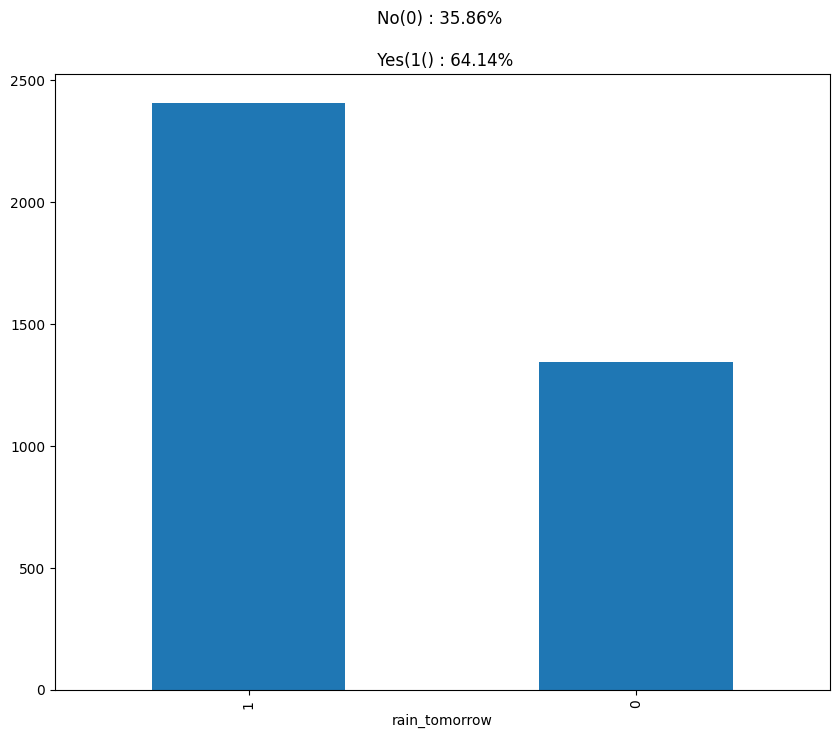

In [21]:
no_rain = len(df[df['rain_tomorrow'] == 0])
yes_rain = len(df[df['rain_tomorrow'] == 1])
percent_no = (no_rain / (no_rain + yes_rain)) * 100
percent_yes = (yes_rain / (no_rain + yes_rain)) * 100

plt.title(f"No(0) : {percent_no:.2f}% \n \n Yes(1() : {percent_yes:.2f}%")
df['rain_tomorrow'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Skewness : (2.42)'}, xlabel='amount_rain_tomorrow', ylabel='Count'>

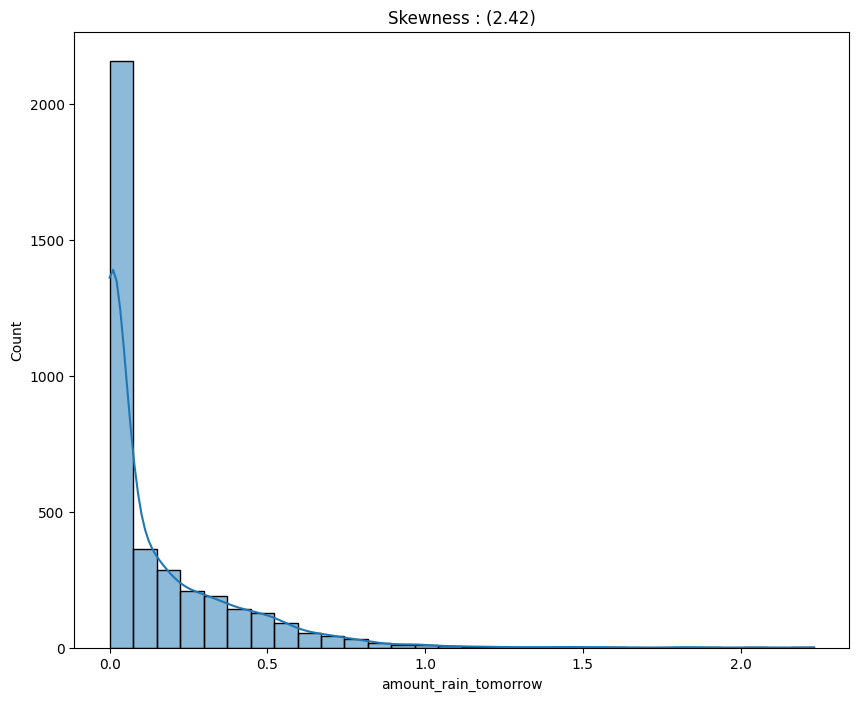

In [22]:
skewness = df['amount_rain_tomorrow'].skew()

plt.title(f'Skewness : ({skewness:.2f})')
sns.histplot(df['amount_rain_tomorrow'], bins=30, kde=True)

<Axes: title={'center': 'Skewness : (1.65)'}, xlabel='amount_rain_tomorrow', ylabel='Count'>

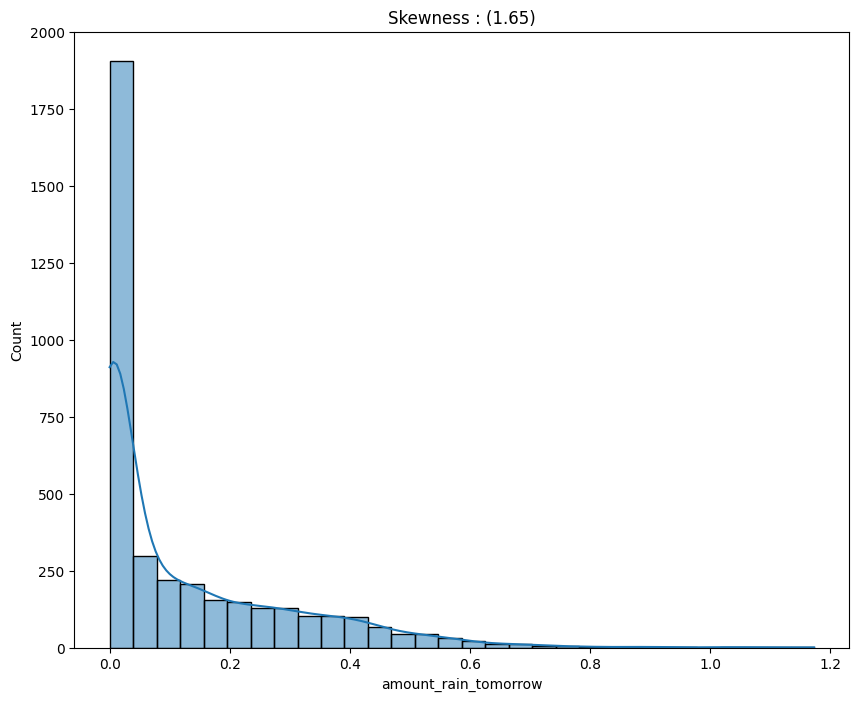

In [23]:
# Log1p Transformation
log_amount_rainfall = np.log1p(df['amount_rain_tomorrow'])
log_skewness = log_amount_rainfall.skew()

plt.title(f'Skewness : ({log_skewness:.2f})')
sns.histplot(log_amount_rainfall, bins=30, kde=True)

In [24]:
df['amount_rain_tomorrow'] = log_amount_rainfall

<Axes: title={'center': 'Monthly Avg Rainfall last decade'}, xlabel='Year', ylabel='Monthly Avg Rainfall'>

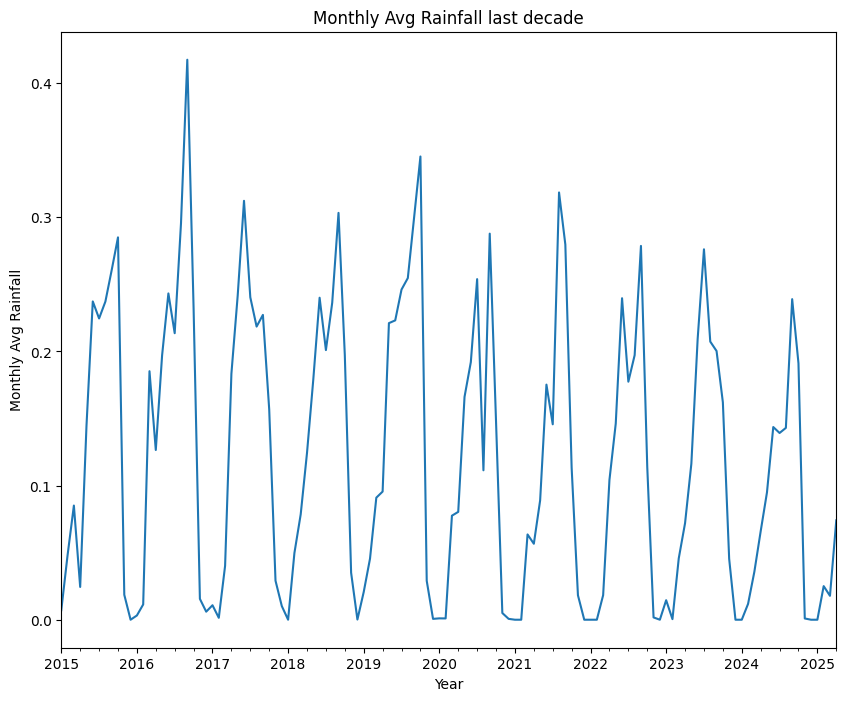

In [25]:
plt.xlabel('Year')
plt.ylabel('Monthly Avg Rainfall')
monthly_avg = df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']])).resample('ME')['amount_rain_tomorrow'].mean()
monthly_avg.plot(title='Monthly Avg Rainfall last decade')

<Axes: title={'center': 'Amount of rain per Month'}, xlabel='Month', ylabel='amount_rain_tomorrow'>

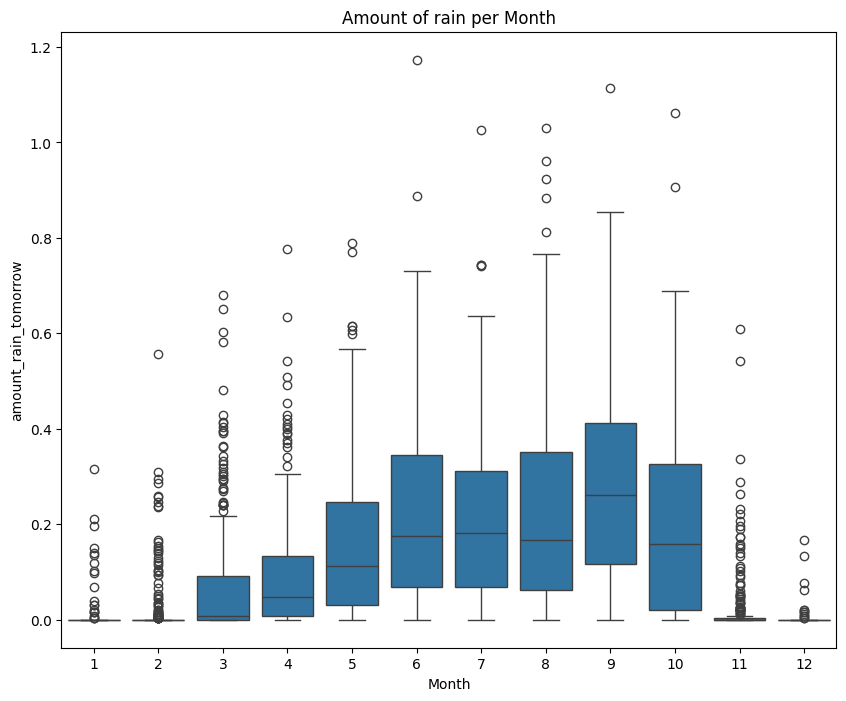

In [26]:
plt.title('Amount of rain per Month')
sns.boxplot(x='Month', y='amount_rain_tomorrow', data=df)

<Axes: title={'center': 'Amount of rain per Day'}, xlabel='day_of_week', ylabel='amount_rain_tomorrow'>

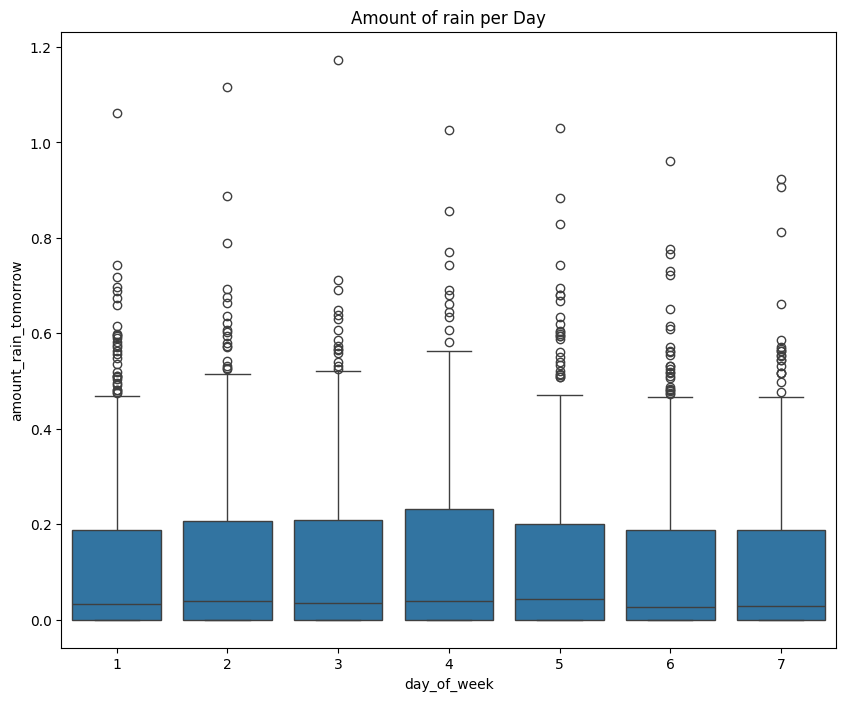

In [27]:
plt.title('Amount of rain per Day')
sns.boxplot(x='day_of_week', y='amount_rain_tomorrow', data=df)

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>]], dtype=object)

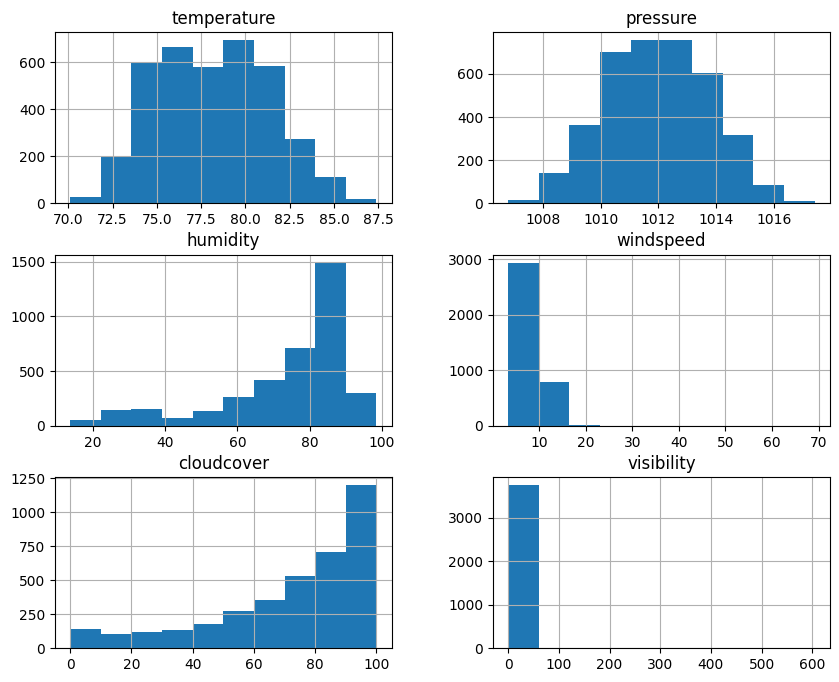

In [28]:
df[['temperature', 'pressure', 'humidity', 'windspeed', 'cloudcover', 'visibility']].hist()

In [29]:
df.groupby('rain_tomorrow')[['temperature', 'pressure', 'humidity', 'windspeed', 'cloudcover', 'visibility']].mean()

,temperature,pressure,humidity,windspeed,cloudcover,visibility
rain_tomorrow,,,,,,
0,80.37,1011.14,55.84,7.82,51.20,11.11
1,76.95,1012.42,83.93,8.94,84.29,9.44


## Feature Engineering

To enhance model performance, key feature engineering steps were implemented. This stage involved generating informative variables, refining the dataset structure, and preparing it for modeling tasks.

### 1. Dropping Non-Predictive Features
- The `Day` column was dropped, as it was not expected to provide meaningful predictive power for rainfall.

### 2. Creating Target Variables
Two new target variables were derived:
- `rain_tomorrow`: A **binary classification target**, indicating whether it will rain the next day (1 = Yes, 0 = No).
- `amount_rain_tomorrow`: A **regression target**, representing the actual expected rainfall amount in millimeters for the next day.

### 3. Preparing Feature Dataset
- Features (`X`) and target variables (`y_class` and `y_reg`) were defined separately for the classification and regression tasks.
- This ensured each model only saw what it needed for its objective.

### 4. Feature Scaling
- **Standardization** was applied to all numerical features using `StandardScaler`.
- The scaling process was fitted on the training sets 

### 5. Final Feature Set
The final dataset used for modeling includes a combination of engineered and selected features, such as:
- Temporal features (`month`, `day_of_week`, `day_of_year`)
- Weather-related features (`temp`, `humidity`, `wind_speed`, `cloud_cover`, etc.)
- Lag features (`rain_yesterday`, `rain_last_7_days`)

These engineered features and transformations set the stage for building robust machine learning models for both classification and regression tasks.


In [30]:
df = df.drop(columns='Day')
df.head(1)

,Year,Month,day_of_week,day_of_year,temperature,pressure,humidity,windspeed,cloudcover,visibility,rain_yesterday,rain_last_7_days,rain_tomorrow,amount_rain_tomorrow
7,2015,1,4,8,77.10,1014.00,24.30,7.80,5.20,9.30,0.00,0.00,0,0.00


In [31]:
classification_taget = df['rain_tomorrow']
regression_target = df['amount_rain_tomorrow']

features = df.drop(columns=['rain_tomorrow', 'amount_rain_tomorrow'])

In [32]:
X_train, X_test, y_class_train, y_class_test = train_test_split(features,
                                                    classification_taget,
                                                    test_size=0.2, 
                                                    random_state=10)
_, _, y_reg_train, y_reg_test = train_test_split(features,
                                                    regression_target,
                                                    test_size=0.2, 
                                                    random_state=10)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Modeling**

In this section, various machine learning models were evaluated for both **classification** and **regression** tasks. The objective was to assess how well different algorithms could predict both the occurrence (classification) and the amount (regression) of rainfall.

### **Model Selection**

For both tasks, a variety of models were considered:

- **Classification Models**:  
  - Logistic Regression  
  - Decision Tree  
  - Random Forest  
  - Gradient Boosting  
  - XGBoost

- **Regression Models**:  
  - Linear Regression  
  - Decision Tree  
  - Random Forest  
  - Gradient Boosting  
  - XGBoost

### **Model Training and Performance**

#### **Classification Results**

| Model               | Accuracy (%) | F1 Score (%) | ROC-AUC (%) |
|---------------------|--------------|--------------|--------------|
| Logistic Regression | 89           | 91           | 89           |
| Decision Tree       | 89           | 91           | 88           |
| Random Forest       | 90           | 91           | 89           |
| Gradient Boosting   | 89           | 91           | 88           |
| XGBoost             | 89           | 91           | 89           |

> All models showed consistent performance, with Random Forest slightly outperforming the rest in terms of overall accuracy and ROC-AUC.

---

#### **Regression Results**

| Model               | R² Score | MAE  | MSE  |
|---------------------|----------|------|------|
| Linear Regression   | 0.39     | 0.09 | 0.02 |
| Decision Tree       | -0.50    | 0.12 | 0.04 |
| Random Forest       | 0.41     | 0.08 | 0.02 |
| Gradient Boosting   | 0.43     | 0.08 | 0.02 |
| XGBoost             | 0.42     | 0.08 | 0.02 |

> Tree-based ensemble models such as **Gradient Boosting** and **XGBoost** gave the best results in regression. The negative R² for the Decision Tree indicates it performed worse than a horizontal mean line, highlighting its unsuitability for this regression task.


In [34]:
# Logistic Regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_class_train)

# Model Evaluation

y_pred = logistic_regression.predict(X_test_scaled)

accuracy = round(accuracy_score(y_class_test, y_pred) * 100)
f1 = round(f1_score(y_class_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_class_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 89
f1 Score:  91
ROC-AUC Score:  89


In [35]:
# Decision Tree

decision_tree_class = DecisionTreeClassifier(max_depth=3, random_state=10)
decision_tree_class.fit(X_train, y_class_train)
y_pred = decision_tree_class.predict(X_test)

accuracy = round(accuracy_score(y_class_test, y_pred) * 100)
f1 = round(f1_score(y_class_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_class_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 89
f1 Score:  91
ROC-AUC Score:  88


In [36]:
# Random Forest

random_forest_class = RandomForestClassifier(n_estimators=100, random_state=10)
random_forest_class.fit(X_train, y_class_train)

y_pred = random_forest_class.predict(X_test)

accuracy = round(accuracy_score(y_class_test, y_pred) * 100)
f1 = round(f1_score(y_class_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_class_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 90
f1 Score:  91
ROC-AUC Score:  89


In [37]:
# Gradient Boosting

gradient_boosting_class = GradientBoostingClassifier(n_estimators=100,
                                               learning_rate=0.1, 
                                               max_depth=3, 
                                               random_state=10)
gradient_boosting_class.fit(X_train, y_class_train)

y_pred = gradient_boosting_class.predict(X_test)

accuracy = round(accuracy_score(y_class_test, y_pred) * 100)
f1 = round(f1_score(y_class_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_class_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 89
f1 Score:  91
ROC-AUC Score:  88


In [38]:
# XGBoost

xg_boost_class = XGBClassifier(n_estimators=100,
                        learning_rate=0.1, 
                        max_depth=3, 
                        random_state=10)
xg_boost_class.fit(X_train, y_class_train)

y_pred = xg_boost_class.predict(X_test)

accuracy = round(accuracy_score(y_class_test, y_pred) * 100)
f1 = round(f1_score(y_class_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_class_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 89
f1 Score:  91
ROC-AUC Score:  89


In [39]:
# Linear Regression

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_reg_train)

# Model Evaluation

y_pred = linear_regression.predict(X_test_scaled)

r2 = round(r2_score(y_reg_test, y_pred), 2)
mae = round(mean_absolute_error(y_reg_test, y_pred), 2)
mse = round(mean_squared_error(y_reg_test, y_pred), 2)

print(f"R squared: {r2}")
print("Mean Absolute Error: ", mae)
print("Mean Squaared Error: ", mse)

R squared: 0.39
Mean Absolute Error:  0.09
Mean Squaared Error:  0.02


In [40]:
# Decision Tree

decision_tree = DecisionTreeRegressor(max_depth=3, random_state=10)
decision_tree.fit(X_train, y_reg_train)
y_pred = decision_tree.predict(X_test)
    
# Model Evaluation

y_pred = decision_tree.predict(X_test_scaled)

r2 = round(r2_score(y_reg_test, y_pred), 2) 
mae = round(mean_absolute_error(y_reg_test, y_pred), 2)
mse = round(mean_squared_error(y_reg_test, y_pred), 2)

print(f"R squared: {r2}")
print("Mean Absolute Error: ", mae)
print("Mean Squaared Error: ", mse)

R squared: -0.5
Mean Absolute Error:  0.12
Mean Squaared Error:  0.04


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [41]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100, random_state=10)
random_forest.fit(X_train, y_reg_train)

y_pred = random_forest.predict(X_test)

r2 = round(r2_score(y_reg_test, y_pred), 2)
mae = round(mean_absolute_error(y_reg_test, y_pred), 2)
mse = round(mean_squared_error(y_reg_test, y_pred), 2)

print(f"R squared: {r2}")
print("Mean Absolute Error: ", mae)
print("Mean Squaared Error: ", mse)

R squared: 0.41
Mean Absolute Error:  0.08
Mean Squaared Error:  0.02


In [42]:
# Gradient Boosting

gradient_boosting = GradientBoostingRegressor(n_estimators=100,
                                               learning_rate=0.1, 
                                               max_depth=3, 
                                               random_state=10)
gradient_boosting.fit(X_train, y_reg_train)

y_pred = gradient_boosting.predict(X_test)

r2 = round(r2_score(y_reg_test, y_pred), 2)
mae = round(mean_absolute_error(y_reg_test, y_pred), 2)
mse = round(mean_squared_error(y_reg_test, y_pred), 2)

print(f"R squared: {r2}")
print("Mean Absolute Error: ", mae)
print("Mean Squaared Error: ", mse)

R squared: 0.43
Mean Absolute Error:  0.08
Mean Squaared Error:  0.02


In [43]:
# XGBoost

xg_boost = XGBRegressor(n_estimators=100,
                        learning_rate=0.1, 
                        max_depth=3, 
                        random_state=10)
xg_boost.fit(X_train, y_reg_train)

y_pred = xg_boost.predict(X_test)

r2 = round(r2_score(y_reg_test, y_pred), 2)
mae = round(mean_absolute_error(y_reg_test, y_pred), 2)
mse = round(mean_squared_error(y_reg_test, y_pred), 2)

print(f"R squared: {r2}")
print("Mean Absolute Error: ", mae)
print("Mean Squaared Error: ", mse)

R squared: 0.42
Mean Absolute Error:  0.08
Mean Squaared Error:  0.02


## **Model Evaluation**

In this section, both **visual** and **quantitative** techniques were used to evaluate model performance and make informed decisions on the final models selected for classification and regression.

---

### **Classification Evaluation**

#### **Confusion Matrix**

The confusion matrix for predicting **RainTomorrow** (Yes/No) was visualized to assess how well the classification model distinguishes between rain and no rain days.

|                | Predicted: No Rain | Predicted: Rain |
|----------------|--------------------|-----------------|
| Actual: No Rain| 255                | 40              |
| Actual: Rain   | 38                 | 418             |

- **True Positives (Rain-Rain)**: 418  
- **True Negatives (No Rain–No Rain)**: 255  
- **False Positives (No Rain–Rain)**: 38  
- **False Negatives (Rain–No Rain)**: 40

This indicates a **balanced performance**, with relatively low false positives and false negatives.

---

### **Regression Evaluation**

Two plots were used to evaluate the regression model:

- **Predictions vs Actuals Plot**: Showed that the predicted values align reasonably with the actual rainfall amounts, especially in the lower and moderate range.
  
- **Residual Plot**: Displayed the residuals (errors) from the regression model. The residuals exhibited a **right-skewed distribution** with a **skewness of 1.3**, indicating some overprediction for higher rainfall values.

---

### **Final Model Selection**

Based on **performance metrics**:

- **Random Forest** was selected for the **Classification** task due to its slightly better accuracy and ROC-AUC compared to other models.
  
- **Gradient Boosting** was chosen for the **Regression** task because it achieved the **highest R² score** and had the most consistent error distribution.

> These final models strike a good balance between predictive power and generalization on unseen data.


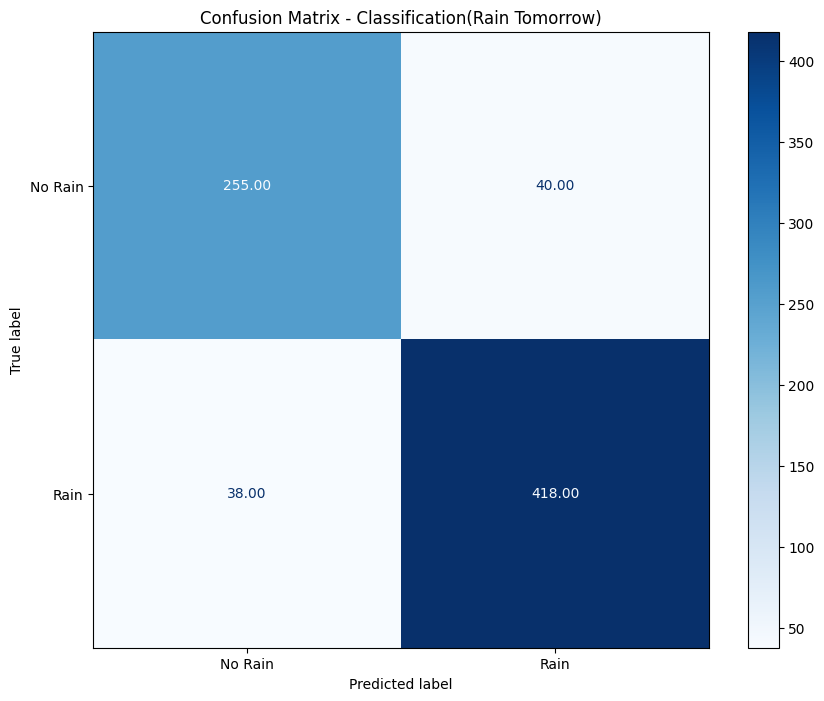

In [44]:
y_pred = random_forest_class.predict(X_test)

cm = confusion_matrix(y_class_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title("Confusion Matrix - Classification(Rain Tomorrow)")
plt.show()

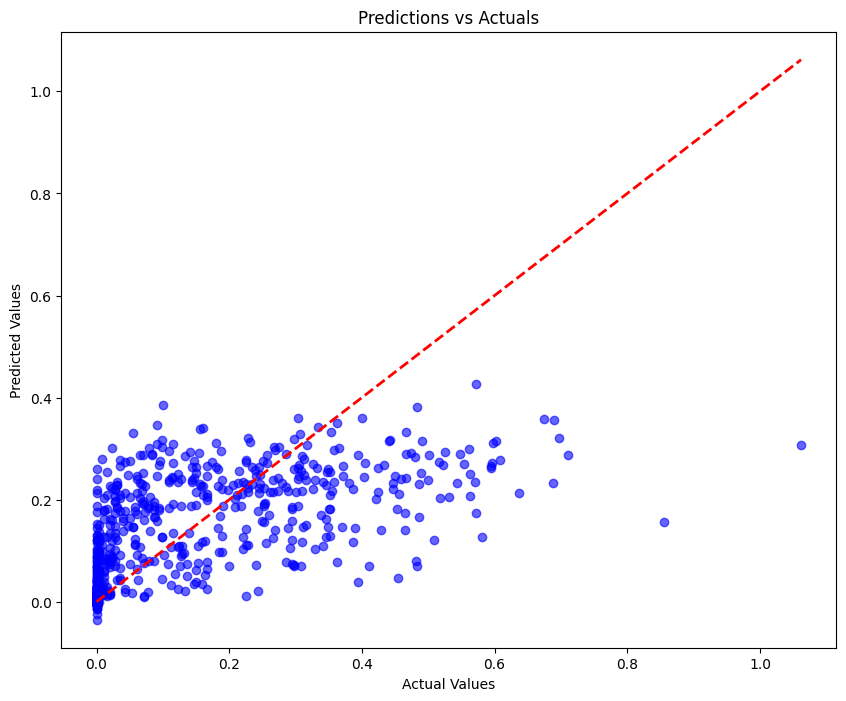

In [45]:
y_pred = gradient_boosting.predict(X_test)

plt.scatter(y_reg_test, y_pred, c="blue", alpha=0.6)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], color='red', linestyle='--', lw=2)
plt.title('Predictions vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Text(0.5, 1.0, 'Residual Skew : (1.3)')

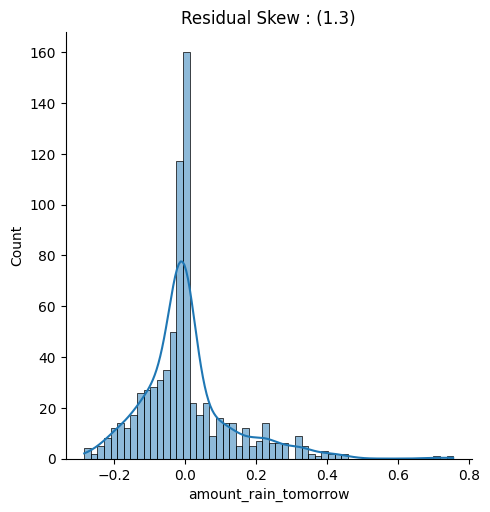

In [46]:
residuals = y_reg_test - y_pred
residual_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True)
plt.title(f'Residual Skew : ({residual_skew})')

## **Predictions**

In this section, the final models were tested using sample input values to simulate real-world predictions and provide interpretable results.

---
### **Model Inference**

- The **classification model** predicts whether it will **rain tomorrow** (`RainTomorrow`).
- The **regression model** estimates the **amount of rainfall** in millimeters.

Since the regression target was log-transformed during training (`log1p`), the **exponential** (`expm1`) of the predicted output was taken to recover the original scale of rainfall.

---
### **Rainfall Interpretation**

Based on the predicted amount of rainfall, the model categorizes it into different levels:

- **0–0.9 mm**: Very light rain  
- **1–2 mm**: Light rain  
- **>2 mm**: Moderate rain  

A final conditional output was used to generate a human-readable prediction

---
### **Conclusion**

This setup enables not only the **binary prediction** of rain occurrence but also gives an **estimated quantity** and **interpretation** of rainfall intensity, making it practical for daily weather advisories.


In [47]:
average_vals = features.mean().values
prediction_df = pd.DataFrame(data= average_vals.reshape(1, len(features.columns)), columns=features.columns)

In [48]:
prediction_df['Year'] = 2025
prediction_df['Month'] = 4
prediction_df['day_of_week'] = 2
prediction_df['day_of_year'] = 111
prediction_df['temperature'] = 80.4
prediction_df['pressure'] = 1007.8
prediction_df['humidity'] = 71.5
prediction_df['windspeed'] = 9.2
prediction_df['cloudcover'] = 74.5
prediction_df['visibility'] = 15
prediction_df['rain_yesterday'] = 0
prediction_df['rain_last_7_days'] = 0.97

In [49]:
rain_tomorrow = random_forest_class.predict(prediction_df)[0]
log_amount_rainfall = gradient_boosting.predict(prediction_df)[0]
amount_rainfall = np.expm1(log_amount_rainfall)

if 0 < amount_rainfall < 1:
    intensity = 'Very Light'
elif 1 <= amount_rainfall <= 2:
    intensity = 'Light'
elif amount_rainfall > 2:
    intensity = 'Moderaate Rain'
    
if rain_tomorrow == 1:
    print("Yes, it'll RAIN tomorrow")
    print(f'It will be a {intensity} Rain')
elif rain_tomorrow == 0:
    print("No, it'll NOT RAIN tomorrow")

Yes, it'll RAIN tomorrow
It will be a Very Light Rain


## **Conclusion & Next Steps**

---

### **Summary of Findings**

This project explored the prediction of **rainfall occurrence** (classification) and **rainfall amount** (regression) using machine learning models. After preprocessing and transforming the data:

- **Random Forest** emerged as the best model for **classification**, achieving 90% accuracy and 91% F1-score.
- **Gradient Boosting** was the top performer for **regression**, with an R² score of 0.43, MAE of 0.08, and MSE of 0.02.

These models provide consistent performance and reasonable interpretability for practical weather forecasting.

---

### **Real-world Implications**

With this system, daily weather forecasts, particularly **rainfall prediction**, can be automated and personalized for local regions. This has potential applications in:

- **Agriculture** (irrigation planning)
- **Transport** (scheduling and logistics)
- **Event Planning** and general **public advisories**

---

### **Limitations**

- The model currently works for a single location based on the training dataset.
- Web scraping or API integration for real-time data is not yet implemented.
- The regression model, while informative, has moderate predictive power (R² < 0.5).

---

### **Possible Improvements**

- Incorporating **external weather APIs** or automating **data scraping**.
- Tuning hyperparameters further for optimal model performance.
- Exploring **deep learning** models for better regression accuracy.
- Adding **temporal features** (e.g., seasonality, lag features) to improve predictions.

---

### **Ideas for Future Work**

- Extend the system to **support multiple states or countries**.
- Build a **frontend dashboard** for public access to daily rainfall predictions.
- Host the solution on **PythonAnywhere** or other cloud platforms to:
  - Run the prediction script **daily** (e.g., every evening).
  - **Send email notifications** with the predicted rainfall and category.

This is a solid foundation for a **fully-deployable weather prediction app** with great potential.

---

## **Appendix / References**

- [Visual Crossing Website](https://weather.visualcrossing.com)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)
- [Matplotlib Documentation](https://matplotlib.org/stable/)
- [Seaborn Documentation](https://seaborn.pydata.org/)

---
